# Integración por Taylor

Aquí veremos un ejemplo sencillo de cómo integrar usando el método de Tayor en un problema de valor inicial, o sea, para una ecuación diferencial ordinaria con una condición inicial.

El punto de partida, y *absolutamente importante* en todo lo que sigue, es el [Teorema Fundamental de las Ecuaciones Diferenciales Ordinarias](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), (o teorema de existencia y unicidad de las EDOs):

#### Teorema

Consideren el problema de valores iniciales $y'(t)=f(t,y(t)),\ y(t_0)=y_0$. Suponemos que $f(t,y)$ es Lipschitz uniformemente continua en $y$ (lo que significa que hay una constante, independiente de $t$, que acota $f$ para todo intervalo de su dominio) y continua en $t$. Entonces, para algún valor $\varepsilon > 0$ existe una solución única $y(t)$ al problema de valor inicial en el intervalo $[t_0-\varepsilon, t_0+\varepsilon]$.

**Importante:** El teorema establece la existencia y unicidad de la solución en un intervalo de $t$ en torno al valor $t_0$ que especifica la condición inicial. Esto, sin embargo, **no** implica que la solución exista para todo tiempo $t>t_0$.

## Un ejemplo sencillo

El método de Taylor lo describiremos a través de un ejemplo. Concretamente, ilustraremos como integrar la ecuación diferencial

\begin{equation}
\dot{x} = f(x) = x^2,
\end{equation}

con $x(0) = 3$.

Antes de describir el método, vale la pena notar que esta ecuación la podemos resolver analíticamente. La solución, como se puede comprobar rápidamente es

\begin{equation}
x(t) = \frac{3}{1-3t}.
\end{equation}

Esta solución muestra que $x(t)\to\infty$ cuando $t\to 1/3$; esto es un ejemplo de que la solución $x(t)$ **no existe** para $t>1/3$. 


El punto importante de este comentario es que, sin importar el método de integración, si hiciéramos una integración "larga" usando un *paso de integración constante* (o sea, a partir de $x(t_k)$ obtenemos $x(t_{k+1})$, con $t_{k+1} = t_0 + (k+1)\delta t = t_k + \delta t$), el método continuará la integración más allá de $t=1/3$, que es hasta donde tiene sentido la solución, a menos de que tengamos la buena fortuna de caer exactamente en $t_n=1$. Esto es una *advertencia* de que uno debe ser extremandamente cuidadoso si considera pasos de integración constantes. 

Sin embargo, si tenemos un método de integración con paso adaptativo, hay esperanza de que este problema no ocurra.


La idea del método de Taylor es construir una solución (local en $t$) que aproxime muy bien la solución de la ecuación diferencial en alguna vecindad del punto inicial $t_0$. En particular, escribimos el polinomios (en torno a $t_0$), esto es

\begin{equation}
x(t) = \sum_{k=0}^\infty x_{[k]}(t_0)\, (t-t_0)^k,
\end{equation}

donde $x_{[k]}(t_0)$ es el coeficiente de Taylor de orden $k$. Esta solución cumple la condición inicial imponiendo $x_{[0]}(t_0) = x_0$. 
Excepto por $x_{[0]}(t_0)$, el resto de los coeficientes del desarrollo son por determinar, cosa que haremos iterativamente. 

Empezaremos considerando que $p$ es infinito, o sea, construiremos la solución analítica; después entraremos en las sutilezas de tener aproximaciones de orden finito.

### Solución a primer orden

Escribimos, como aproximación de primer orden a la solución en la forma $x(t) = x_0 + x{[1]}(t_0)\, (t-t_0) + \mathcal{O}((t-t_0)^2)$, y queremos obtener el valor de $x_{[1]}(t_0)$. De aquí, tenemos que $\dot{x} = x{[1]}+ \mathcal{O}((t-t_0))$, y sustituyendo en ambos lados de la ecuación diferencial obtenemos

\begin{eqnarray}
x{[1]} + \mathcal{O}((t-t_0)) & = & \big[x_0 + x{[1]}(t_0)\, (t-t_0) + \mathcal{O}((t-t_0)^2)\big]^2 \\
& = & x_0^2 + \mathcal{O}((t-t_0)).
\end{eqnarray}

De aquí concluimos que $x_{[1]}=x_0^2$.

Es importante notar que **no** necesitamos hacer el cálculo explícito del cuadrado de todo el polinomio; *únicamente* calculamos (y usamos) el término de orden cero en el lado derecho de la ecuación.

### Solución a segundo orden y órdenes mayores

Para la aproximación a segundo orden escribimos $x(t) = x_0 + x_0^2 (t-t_0) + x{[2]}(t-t_0)^2+\mathcal{O}((t-t_0)^3)$, donde queremos obtener $x_{[2]}(t_0)$. En este caso, la derivada es $\dot{x} = x_0^2 + x_{[2]}(t_0)\,(t-t_0) + \mathcal{O}((t-t_0)^2)$, y sustituyendo nuevamente en la ecuación diferencial obtenemos

\begin{eqnarray}
x_0^2 + 2 x_{[2]}(t_0)\,(t-t_0) + \mathcal{O}((t-t_0)^2) & = & \big[x_0 + x_0^2 (t-t_0) + x{[2]}(t-t_0)^2+\mathcal{O}((t-t_0)^3)\big]^2 \\
& = & x_0^2 + 2 x_0^3 (t-t_0) + \mathcal{O}((t-t_0)^2).
\end{eqnarray}

De aquí obtenemos $x_{[2]}(t_0) = x_0^3$. Nuevamente, vale la pena enfatizar que el lado derecho de la ecuación sólo se calcula a primer orden.

Para órdenes más altos, uno continua de igual manera: $x(t) = x_0 + x_0^2 (t-t_0) + x_0^3 (t-t_0)^2+ x{[3]}(t-t_0)^3+\mathcal{O}((t-t_0)^4)$, y al derivar y substituir $x^2$, se obtiene $x{[3]}(t_0)=x_0^4$. Y así se continua sucesivamente.

Finalmente, se obtiene que

\begin{eqnarray}
x(t) & = & x_0 + x_0^2 (t-t_0) + x_0^3 (t-t_0)^2 + x_0^4 (t-t_0)^3 + \dots \\
     & = & x_0 \big(1 + x_0 (t-t_0) + x_0^2 (t-t_0)^2 + \dots\big) = \frac{x_0}{1-x_0(t-t_0)},\\
\end{eqnarray}

donde $t$ está limitado por $t - t_0 = 1/x_0$. Esto coincide con el resultado analítico que se espera.

Vale la pena notar que, para que la serie converja absolutamente, se requiere que los términos sucesivos satisfagan ($t>t_0$)

\begin{equation}
\Big | \frac{ x_{[n]}(t_0)\, (t-t_0)^n }{x_{[n+1]}(t_0)\, (t-t_0)^{n+1}}\Big| = \frac{1}{|x_0|(t-t_0)} < 1,
\end{equation}

lo que define el radio de convergencia en $t$ de la serie.

## El método de Taylor

### Relaciones de recurrencia de los coeficientes de Taylor

En general, para la ecuación diferencial $\dot{x} = f(x(t))$ con $x_0=x(t_0)$, uno puede demostrar que los coeficientes $x_{[k]}$ están dados por

\begin{equation}
x_{[k]} = \frac{f_{[k-1]}}{k},
\end{equation}

donde los coeficientes $f_{[k']}$ son los coeficientes del desarrollo en serie de Taylor en $t-t_0$ de $f(x(t))$. Esta es una relación de recurrencia para $x_{[k]}$. Es claro que, dado que el lado derecho de la ecuación anterior involucra los coeficientes $f_{[k']}$, uno debe implementar funciones que permitan calcular dichos coeficientes.

### Paso de integración

Claramente, lo descrito más arriba no se puede implementar en la computadora. Es decir, estamos obligados a truncar el polinomio de Taylor en un grado $p$ (finito). Formalmente,  escribimos

\begin{equation}
x(t) = \sum_{k=0}^p x_{[k]}(t_0)\, (t-t_0)^k + \mathcal{R}_p ,
\end{equation}

donde el *residuo* está dado por

\begin{equation}
\mathcal{R}_p = x_{[p+1]}(\xi)\, (t-t_0)^{p+1},
\end{equation}
 y $\xi \in [t_0, t]$.

Queremos, entonces, truncar la serie en un $p$ finito, pero suficientemente grande de tal manera que el residuo sea pequeño.

¿Dónde truncamos? En general esto sólo lo podemos contestar si podemos conocer el residuo (en términos de $p$), cosa que no es sencilla. 

Es por esto que uno *usa* las propiedades de convergencia de la serie de Taylor para $x(t)$, para $p$ *suficientemente* grande. Si $p$ es suficientemente grande, entonces las correcciones sucesivas serán cada vez menores, ya que la serie es convergente. 

En particular, para $p$ suficientemente grande tendremos

\begin{equation}
\big| \, x_{[p]}(t_0)\, (t-t_0)^p \, \big| \leq \epsilon,
\end{equation}

donde $\epsilon$ es una cota, *suficientemente pequeña*, para *todos* los términos sucesivos.

De aquí obtenemos una cota para el paso de integración $h=t-t_0$,

\begin{equation}
h = t-t_0 \leq \Big(\frac{\epsilon}{\big| x_{[p]}(t_0)\big|}\Big)^{1/p}.
\end{equation}

Uno elige $\epsilon$ para que sea mucho menor que el epsilon de la máquina. 

El paso de integración obtenido depende de $t_0$; por lo tanto, al hacer la evolución temporal, distintos pasos de integración se irán calculando, por lo que el paso de integración en general no será constante.

Algo importante que vale la pena hacer notar es que, fijando $h$ de tal manera que se garantiza la convergencia de la serie, la serie de Taylor se aplica a todo valor de $t$ tal que $t_0 \leq t \leq t_0 + h$.

En la práctica, y dado que normalmente uno lidia con ecuaciones de segundo orden, uno considera el menor de los pasos de integración obtenidos a partir de los dos últimos términos de la serie de Taylor.

Es *importante* enfatizar que este procedimiento sólo funciona cuando el orden $p$ es suficientemente grande, de tal manera que estamos entrados en la cola convergente de la serie. 

### Sumando la serie

Una vez que tenemos el paso de integración $h$, queremos sumar la serie para obtener $x(t_1)$ con $t_1 = t_0+h$. Para esto, simplemente debemos sumar la serie

\begin{equation}
x(t_1) = x(t_0+h) = \sum_{k=0}^p x_{[k]}(t_0)\, h^k.
\end{equation}

Numéricamente, la mejor manera de hacer esto es usando [el método de Horner](https://en.wikipedia.org/wiki/Horner%27s_method). El método de Horner consiste en factorizar de manera apropiada el polinomio, el cual sólo se evalúa a través de productos y sumas (¡sin potencias!). Esto permite, por un lado, minimizar el número de operaciones, y en el caso de series de Taylor de orden suficientemente grande para estar en la cola convergente, considerar correctamente los términos pequeños.

Reescribiendo la serie tenemos

\begin{eqnarray}
x(t_1) & = & x_0 + x_{[1]} \, h + \dots + x_{[p-1]} \,h^{p-1} + x_{[p]} \, h^p\\
& = & x_0 + x_{[1]} \, h + \dots + h^{p-1} ( x_{[p-1]} + h x_{[p]} )\\
& = & x_0 + x_{[1]} \, h + \dots + h^{p-2} ( x_{[p-2]} + h ( x_{[p-1]} + h x_{[p]} ) )\\
& = & x_0 + h\big( x_{[1]} + h(... + h ( x_{[p-1]} + h x_{[p]} )...\big).
\end{eqnarray}

Entonces, consideramos primero (para la suma) el término $x_{[p]}$ y $x_{[p]}$, a partir de los cuales construimos $\tilde{x}_{p-1} = x_{[p-1]} + h x_{[p]}$, y usando $\tilde{x}_{p-1}$ obtenemos $\tilde{x}_{p-2} = x_{[p-2]} + h \tilde{x}_{p-1}$, y así sucesivamente hasta tener $\tilde{x}_0=x(t_1)$, que es el resultado buscado.

Una vez que hemos obtenido $x(t_1)$, uno utiliza este valor como la nueva condición inicial, y simplemente se iteran los pasos anteriores hasta obtener $x(t_2)$.

## Tarea 7

In [1]:
include("Taylor.jl")
using ADT

**NOTA** El contenido de este ejercicio se incluirá en la "Tarea7.ipynb". Nuevamente, esta tarea deberá ser elaborada en equipos.

### Ejercicio

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio, que obtuvieron en la "Tarea6", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}(t_0)$ de la expansión. Esta función deberá llamar a otra donde se implementan las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$.

- Otra función donde se haga la suma por el método de Horner.

- Finalmente, una función que use las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde hay problemas).


Dado que conocemos la solución analítica, den como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

Primero que nada, definamos una función que "resuelva" una ecuación diferencial por medio de los polinomios de Taylor. Esto es que, para un $t_0$ fijo, calcule la expansión de Taylor de la solución $x(t)$ alrededor de $t_0$.

In [2]:
"""
Función que encuentra los coeficientes de la solución (como estructura Taylor) a una ecuación diferencial con condición
inicial para un tiempo dado, truncándose en el término n.
"""
function coef(x0::Number, F::Function, n = 21)
    # el índice final n se define en función de la precisión necesaria
    
    a = [x0;fill(0.0,n-1)] # prealocamos memoria
    
    for k = 1:n-1
        if a[1] != 0
            bool = find(a)[end] # definimos un índice booleano que encuentre los elementos no-nulos
            b = Taylor(a[1:bool])
        else
            b = Taylor(a)
        end
        f = F(b)
        a[k+1] = f.pol[k]/(k) # relación de recurrencia
    end
    return Taylor(a)
end

coef (generic function with 2 methods)

Probamos la función y vemos que funciona bien.

In [5]:
@time a = coef(3,x->x^2)

  0.004857 seconds (23.13 k allocations: 393.215 KB)


ADT.Taylor{Float64}([3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,19683.0,59049.0  …  531441.0,1.59432e6,4.78297e6,1.43489e7,4.30467e7,1.2914e8,3.8742e8,1.16226e9,3.48678e9,1.04604e10])

Ahora definimos una función que determina el paso integrador. A diferencia de otros métodos integradores que tienen un paso integrador fijo, aquí encontramos un paso integrador adaptativo, que nos permite encontrar la solución sin preocuparnos tanto por puntos de divergencia.

In [6]:
eps_abs = 1e-20

1.0e-20

In [7]:
"""
Esta función determina el paso iterativo donde es convergente la solución del integrador truncando en 21 términos.
"""
function paso(a::Taylor, p = 21)
    
    while p != 0 && a.pol[p] == 0
       p = p-1;
    end
    #println ("N donde truncamos = $p")
    h = 0.5*(eps_abs/abs(a.pol[p]))^(1/p)
end

paso (generic function with 2 methods)

In [8]:
paso(a)

0.018598066541795813

Finalmente - y aunque ya teníamos definida una función para la evaluación de estructuras Taylor (definida en el módulo ADT como `evaluar`) - creamos una función que evalúe los polinomios usando el método de Horner.

In [9]:
"""
Evaluación de un Taylor usando el método de Horner.
"""
function ev_horner{T<:Number}(a::Taylor,t0::T)
    
    n = gradomax(a)
    x1 = a.pol[n]
    
    for k = 1:n-1
        x1 = a.pol[n-k] + x1*t0
    end
    return x1
end

ev_horner (generic function with 1 method)

In [12]:
@time ev_horner(a,0)

  0.000004 seconds (5 allocations: 176 bytes)


3.0

In [13]:
"""
Nuestro súper integrador vía Taylor para problemas de condición inicial. Acepta x0 condición inicial y el intervalo (t0,tf),
así como la función a integrar.
"""
function integrador_taylor(x0::Number, t0::Number, tf::Number, f::Function)
    nmax = 700
    t = [t0]
    x = [x0]
    H = [0.0] # por si alguien los requiere
    n = 0
    while t0 < tf && isnan(x0) == false && n < nmax
        
        eps_abs = 1e-20
        
        S = coef(x0,f)
        h = paso(S)
        
        t0 += h
        
        x0 = ev_horner(S,h)
        
        push!(t,t0)
        push!(x,x0)
        push!(H,h)
        n += 1
    end
    return t,x,H
end

integrador_taylor (generic function with 1 method)

Probemos ahora nuestro integrador con el siguiente problema:
$$ \frac{dx}{dt} \equiv f(x) = x^2$$
con $x(0) = 3$.

In [14]:
f(x) = x^2.;

(T,X) = integrador_taylor(3., 0., 0.5, f);
length(T)

701

Comparemos ahora con la solución analítica que - gracias a nuestros enormes conocimientos de ecuaciones diferenciales, que obtuvimos del mismísimo Luis Benet en clase - conocemos:

$$ x(t) = \frac{3}{1-3x} $$

In [15]:
g(x) = 3/(1-3*x);

G = map(g,T);

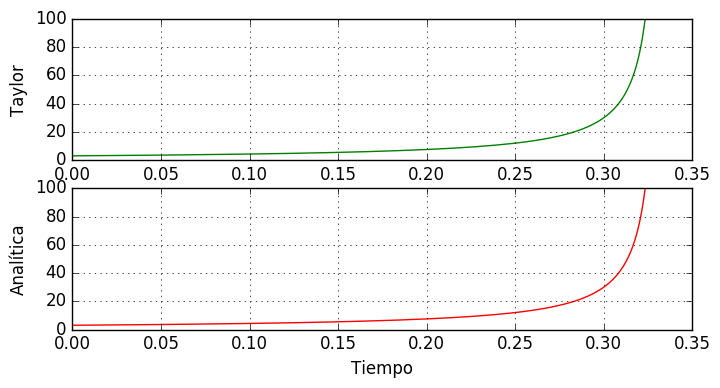

In [16]:
using PyPlot
subplot(3,1,1)
plot(T, X, color="green")
axis([0.,0.35,0,100])
ylabel("Taylor")
grid()
subplot(3,1,2)
plot(T, G, color="red")
axis([0.,0.35,0,100])
ylabel("Analítica")
xlabel("Tiempo")
grid()

Veamos ahora el error absoluto de nuestra solución.

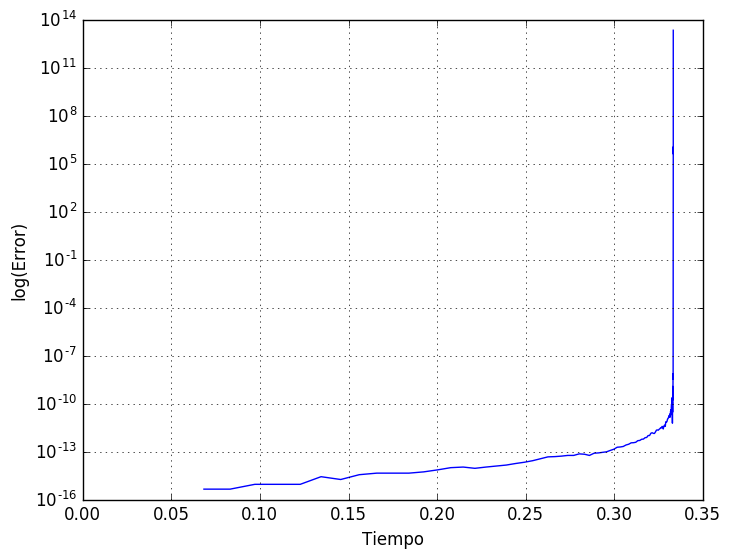

In [18]:
ER = abs(G-X);
semilogy(T, ER)
# axis([1e-2,1,1e-16,1e7])
xlabel("Tiempo")
ylabel("log(Error)")
grid()

... de donde observamos que el error se hace muy grande a medida que $t \rightarrow \frac{1}{3}$, mientras que para valores alejados de este número se tiene convergencia muy buena.

### Ejercicio

Repitan los cálculos usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

Los métodos de Runge-Kutta constituyen una familia de métodos iterativos para resolver EDO´s en tiempo discreto, tanto de forma explícita como implícita. Sin embargo, en este caso, tomaremos el método más utilizado, conocido como RK4. Para esto consideramos una ecuación diferencial ordinaria con condición inicial dada por:

$$\dot{x}=f(t,x) \quad x(t_0)=x_0$$

En donde consideramos que f es una función contínua y diferenciable y que $\frac{\partial f}{\partial x}$ también lo es. Estas son símplemente las hipótesis del Teorema de Existencia-Unicidad, las cuales nos garantizan que el problema tendrá solución única $x(t)$ donde $t\in[t_0+a,t_0-a]$. A continuación se introduce una paso h de valor fijo de modo que: 

$$\dot{x}(t_0)\approx \frac{x(t_0+h)-x(t_0)}{h} \implies x(t_0+h)\approx x(t_0)+h \dot{x}(t_0)$$

De esta manera se puede calcular iteradamente el valor de $x$ en el siguiente punto mediante $x_{n+1}=x_{n}+h \dot{x_n}$ donde $x_{n}=x(t_0+nh)$ y $t_n=t_0+nh$. Con esto, los métodos iterativos utilizan la media ponderada de $f$ evaluada en varios puntos posteriores para aproximar la derivada. En particlar, el método RK4 está dado por:

\begin{align}
x_{n+1} &= x_n + \tfrac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)\\
t_{n+1} &= t_n + h \\
\end{align}

en donde $n =0,1,...,p$ con $p=\cfrac{t_f-t_0}{h}$ el número de pasos y $t_f$ el tiempo final de evaluación. Cabe mencionar que el método funcione se debería tener $t_f < a$. Además, los coeficientes $k_1,k_2,k_3,k_4$ se calcular mediente:

\begin{align}
k_1 &= f(t_n, x_n),
\\
k_2 &= f(t_n + \tfrac{h}{2}, x_n + \tfrac{h}{2} k_1),
\\
k_3 &= f(t_n + \tfrac{h}{2}, x_n + \tfrac{h}{2} k_2),
\\
k_4 &= f(t_n + h, x_n + hk_3).
\end{align}

En realidad, dado que utilizaremos derivación automática con polinomios de Taylor para esta tarea, deberemos asumir que la función $f(t,x(t))=f(t)$ es analítica.

A continuación definimos una función que resuelve una EDO por el método de RK4.

In [19]:
"""
RK4 (f::Function,x_0::Real,t_0::Real,h::Real,p::Integer)

Dada la derivada x'(t)=f(t,x),la condición inicial x(t0)=x0, el paso h y el número de iteraciones p, 
esta función regresa la solución x(t) dada por el método RK4 expresada como un array de p+1 elementos. 
Es importante notar el orden de los argumentos de f=f(t,x). Por el momento, f no puede ser función de solo una variable,
como f(t)=t^2. Sin embargo, f(t,x)=t^2 sí esta permitido.
"""
function RK4(f::Function,x_0::Real,t_0::Real,h::Real,p::Integer)
    @assert p>=0
    x=zeros(typeof(promote(x_0,1.5)[1]),p+1) #inicializar el array solución con el mayor sobre tipo común al de x_0 y Float64 
    #x=zeros(BigFloat,p+1)
    x[1] = x_0
    t = t_0
    
    for i in 1:p
        
        k1 = f(t,x[i])
        k2 = f(t+h/2,x[i]+h*k1/2)
        k3 = f(t+h/2,x[i]+h*k2/2)
        k4 = f(t+h,x[i]+h*k3)
         
        x[i+1] = x[i]+(h/6)*(k1+2k2+2k3+k4)
        
        t += h
    end
    
    return x
end

RK4 (generic function with 1 method)

Definimos la ecuación a resolver $f(x,t) \equiv f(x) = x^2$ con la condición inicial $x(0) = 3$ para $t \in [0,1/3]$ y la solución analítica $x(t) \equiv g(t) = \cfrac{3}{1-3t}$, y comparamos las dos.

In [20]:
f(t,x)=x^2
g(t)=3/(1-3t)

g (generic function with 1 method)

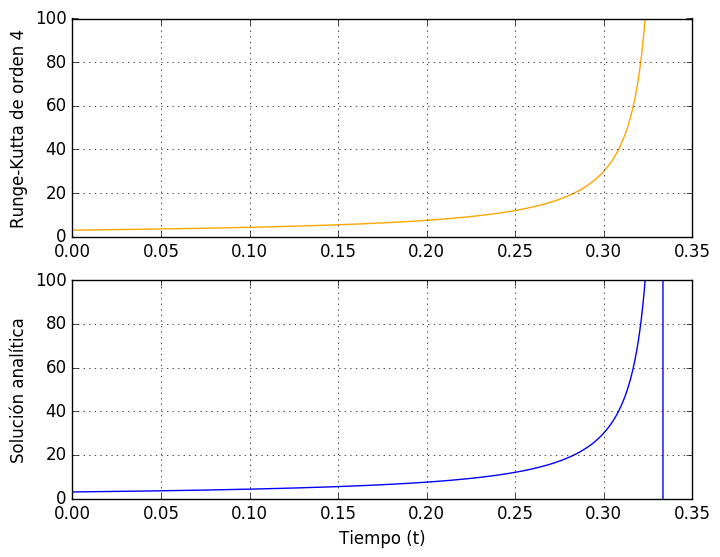

In [34]:
x0 = 3 # condición inicial
t0 = 0 # tiempo inicial 
tf = .334 # tiempo final

p = 4500 # número de pasos
h = (tf-t0)/p # paso iterativo


x = RK4(f,x0,t0,h,p) # solución numérica de RK4

t = linspace(t0,tf,length(x))

G = zeros(t)
E = zeros(t)

for i in 1:length(t)
    G[i] = g(t[i])
    E[i] = abs(g(t[i])-x[i])
end

using PyPlot

subplot(2,1,1)
plot(t, x, color = "orange", label = "RK4")
axis([0,.35,0,100])
ylabel("Runge-Kutta de orden 4")
grid()
subplot(2,1,2)
plot(t, G, label = "Solución analítica")
axis([0,.35,0,100])
ylabel("Solución analítica")
xlabel("Tiempo (t)")
grid()

Y comparamos los errores de nuestras soluciones.

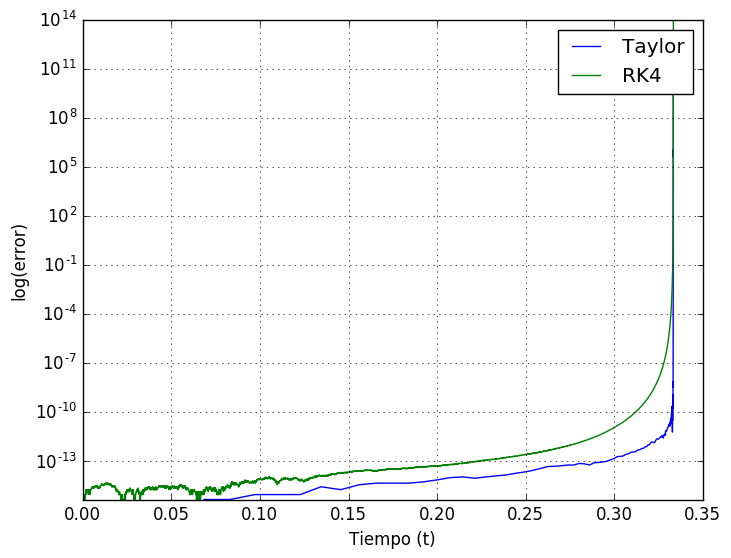

In [45]:
semilogy(T, ER, label = "Taylor")
semilogy(t,E, label = "RK4")
axis([0,.35,0,10^14])
xlabel("Tiempo (t)")
ylabel("log(error)")
legend()
grid()

### Ejercicio

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo para ambos métodos.

La ecuación $\cfrac{d^2x}{dt^2} = f(x) = -2x$ puede ser linealizada como:
$$ \frac{dx}{dt} = y $$
$$ \frac{dy}{dt} = -2x $$

con condiciones iniciales $x(0) = 2$ y $y(0) = 0$.

Si consideramos a $x(t) = x_0 + x_1(t-t_0) + x_2(t-t_0)^2+ ... $ y a $y(t) = y_0 + y_1(t-t_0) + y_2(t-t_0)^2 +...$, utilizando un sistema de ecuaciones como el anterior llegamos (de manera general) a las siguientes relaciones recursivas:

$y_k = \cfrac{f(x)_{k-1}}{k} \equiv \cfrac{f_{k-1}}{k} $, y también $x_k = \cfrac{y_{k-1}}{k} $.

Con esto, podemos implementar una función que calcule al mismo tiempo los coeficientes de las series $x(t), y(t)$ iterativamente.

In [47]:
"""
Solucionador via método de Taylor para un sistema de dos ecuaciones diferenciales lineales. Ver `coef`.
"""
function coef2(x0::Number, y0::Number, F::Function, n = 21)
    # el índice final n se define en función de la precisión necesaria
    
    X = [x0;fill(0.0,n-1)] # prealocamos memoria
    Y = [y0;fill(0.0,n-1)]
    
    for k = 1:n-1
        
        b = Taylor(X)
        f = F(b)
        
        Y[k+1] = f.pol[k]/(k) # relación de recurrencia
        X[k+1] = Y[k]/k
    end
    return Taylor(X), Taylor(Y)
end

coef2 (generic function with 2 methods)

Definimos un epsilon mínimo mucho más chico que antes.

In [48]:
eps_abs = 1e-50

1.0e-50

Y ahora podemos definir una función `integrador_taylor2` para un sistema linealizado de dos ecuaciones diferenciales, modificando ligeramente el código que ya teníamos.

Al momento de calcular el paso iterativo, consideramos el paso de ambas series (tanto para $x$ como para $y$) y tomamos el mínimos entre ellos para tener un buen marco común.

In [49]:
"""
Integrador de un sistema de dos ecuaciones diferenciales lineales en el intervalo [t0,tf] con condiciones
de frontera e iniciales. Ver `integrador_taylor`.
"""
function integrador_taylor2(x0::Number, y0::Number, t0::Number, tf::Number, f::Function)
    
    t = [t0]
    x = [x0]
    y = [y0]
    
    while t0 < tf && isnan(x0) == false
        
        X,Y = coef2(x0,y0,f)
        
        h_x = paso(X)
        h_y = paso(Y)
        h = min(h_x, h_y)
        
        t0 += h
        
        x0 = ev_horner(X,h)
        y0 = ev_horner(Y,h)
        
        push!(t,t0)
        push!(x,x0)
        push!(y,y0)
    end
    return t,x,y
end

integrador_taylor2 (generic function with 1 method)

Definimos nuestra función y nuestras condiciones iniciales.

In [50]:
w(x) = -2*x;
tf = 10^4 * (2*pi/2)
T2,X2,Y2 = integrador_taylor2(2.,0.,0.,tf,w);

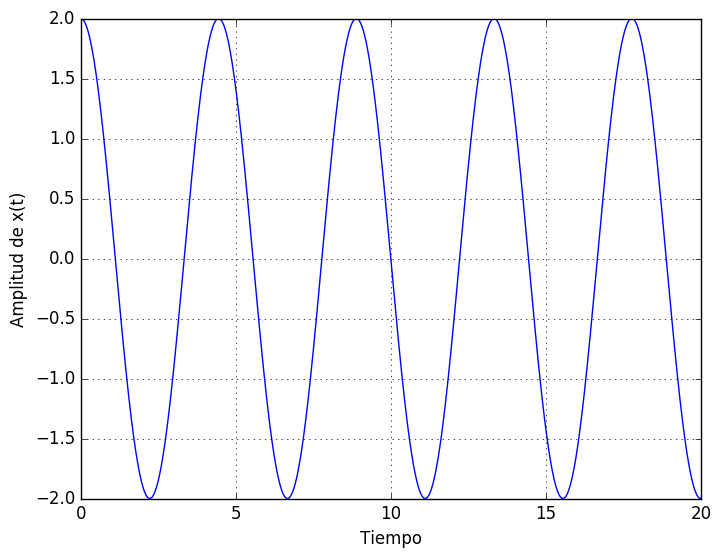

In [52]:
plot(T2,X2)
axis([0,20,-2,2])
xlabel("Tiempo")
ylabel("Amplitud de x(t)")
grid()

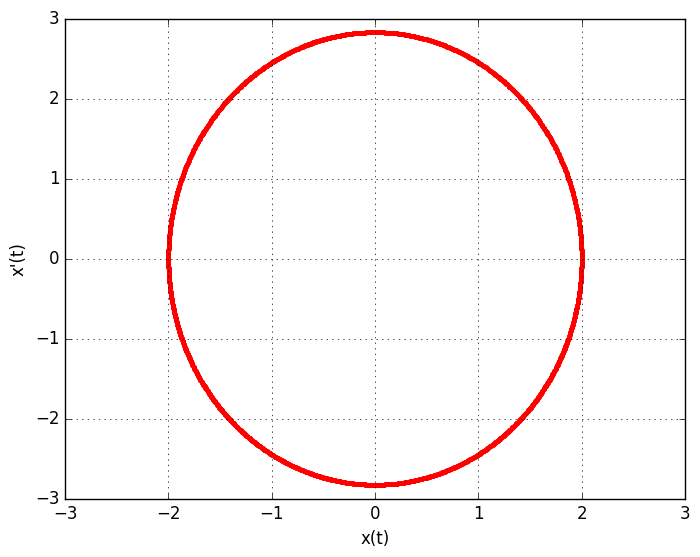

In [53]:
plot(X2,Y2,".", color = "red")
axis([-3,3,-3,3])
xlabel("x(t)")
ylabel("x'(t)")
grid()

Ahora hagamos la integración de esta ecuación mediante Runge-Kutta, para esto hacemos la misma linealización con $f=\frac{dx}{dt} = y $, y
$g=\frac{dy}{dt} = -2x $, con $x(0)=2$ y $y(0)=0$. Luego tenemos este sistema de 2 ODE's que debemos resolver.

In [54]:
"""
Integrador de Runge-Kutta para un sistema de 2 ecuaciones diferenciales ordinarias.

"""
function RK4_orden2(f2::Function,g2::Function,y_0::Real,x_0::Real,t_0::Real,h::Real,p::Integer)
   
    @assert p>=0
    x = zeros(typeof(promote(x_0,1.5)[1]),p+1) #inicializar el array solución con el mayor sobre tipo común al de x_0 y Float64 
    y = zeros(typeof(promote(y_0,1.5)[1]),p+1)
    x[1] = x_0
    y[1] = y_0
    t = t_0
    
    for i in 1:p
        
        k1 = f2(t,x[i],y[i])
        l1 = g2(t,x[i],y[i])
        k2 = f2(t+h/2, x[i]+h*k1/2, y[i]+h*l1/2)
        l2 = g2(t+h/2, x[i]+h*k1/2, y[i]+h*l1/2)
        k3 = f2(t+h/2, x[i]+h*k2/2, y[i]+h*l2/2)
        l3 = g2(t+h/2, x[i]+h*k2/2, y[i]+h*l2/2)
        k4 = f2(t+h, x[i]+h*k3, y[i]+h*l3)
        l4 = g2(t+h, x[i]+h*k3, y[i]+h*l3)
         
        x[i+1] = x[i]+(h/6)*(k1+2k2+2k3+k4)
        y[i+1] = y[i]+(h/6)*(l1+2l2+2l3+l4)
        
        t += h
    end
    return x,y
end

RK4_orden2 (generic function with 1 method)

De la misma manera, establecemos nuestras condiciones iniciales y hacemos la integración numérica.

In [57]:
f2(t,x,y) = y
g2(t,x,y) = -2*x
t0_R2 = 0
tf_R = 20
p_R2 = 13000
h_R2 = (tf_R - t0_R2)/p_R2
xR = RK4_orden2(f2,g2,0,2,t0_R2,h_R2,p_R2)[1];

Veamos cómo se ve la solución en un intervalo de tiempo dado.

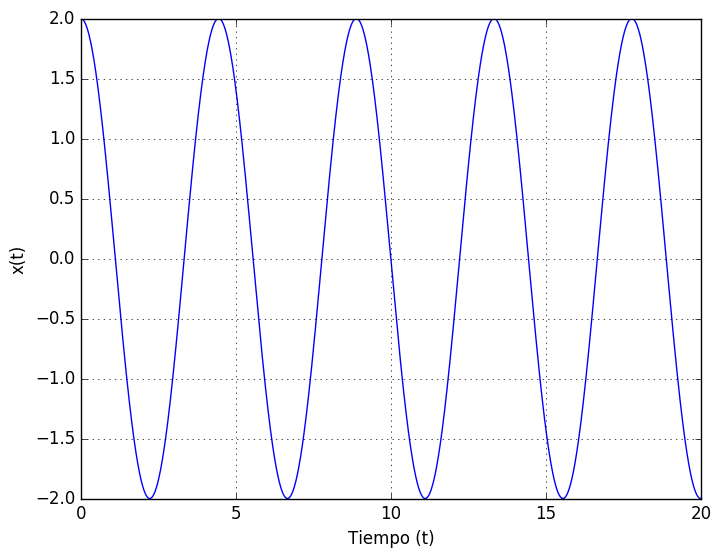

In [58]:
using PyPlot
t1 = linspace(0,20,length(xR))
Graf_R2 = plot(t1,xR)
xlabel("Tiempo (t)")
ylabel("x(t)")
grid()

Ahora que tenemos listas ambas soluciones nos queda solamente analizar el cambio en la energía para ambos métodos, para esto sabemos que $E = \frac{1}{2}mv^2 + \frac{kx^2}{2}$ y dividiendo entre la masa $\frac{E}{m} = \frac{1}{2}v^2 + \frac{k}{2m}x^2$, donde $\frac{k}{m} = \omega^2$ que conocemos de $\ddot{x} + \omega^{2}x = 0$ entonces $\omega^2 = 2$ tomando obviamente masa unitaria.

Calculamos las energías para cada uno de nuestros integradores y las comparamos en una gráfica.

In [59]:
tf_R2 = 10^4*(2*pi/√2)
xR2 = RK4_orden2(f2,g2,0,2,t0_R2,h_R2,p_R2)[1]
yR2 = RK4_orden2(f2,g2,0,2,t0_R2,h_R2,p_R2)[2]
t2 = linspace(0,tf_R2,length(xR2))
E_R2 = zeros(p_R2 + 1)

for i = 1:p_R2 + 1
    E_R2[i] = (yR2[i]^2)/2 + xR2[i]^2  
end

tf = 10^4*(2*pi/√2)
T2,X2,Y2 = integrador_taylor2(2.,0.,0.,tf,w)
E_T = zeros(size(T2))

for i = 1:p_R2 + 1
    E_T[i] = (Y2[i]^2)/2 + X2[i]^2  
end

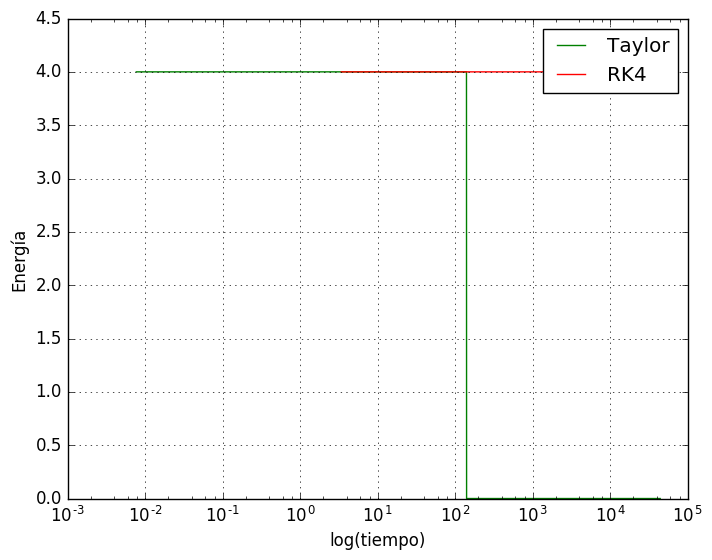

In [61]:
semilogx(T2,E_T,color = "green", label = "Taylor")
semilogx(t2,E_R2,color = "red", label = "RK4")
xlabel("log(tiempo)")
ylabel("Energía")
legend()
grid()

Aquí podemos ver que el valor de la energía (analíticamente 4),se conserva constante para todo tiempo en el método de Runge-Kutta pero se vuelve cero en algún punto para el método de Taylor, específicamente en E_T[13002].

In [249]:
E_T[13001],E_T[13002]

(4.000000000000017,0.0)